# Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,5.0,2.0,5.0,130.606486,130.606486,0.182233,2829.135536,50.0
1,IterativeAssignmentPlanner,100,5.0,2.0,5.0,166.231264,166.231264,0.171066,7407.935460,100.0
2,IterativeAssignmentPlanner,200,5.0,2.0,5.0,263.625916,263.625916,0.396253,21879.453682,200.0
3,IterativeAssignmentPlanner,300,5.0,2.0,5.0,367.569123,367.569123,0.838776,43863.629175,300.0
4,IterativeAssignmentPlanner,400,5.0,2.0,5.0,490.446396,490.446396,1.715262,67979.741933,400.0


In [7]:
planners_names = ['StaticLineLackPlanner',
                  'StaticLineLackSampling1Planner',
                  'StaticLineLackSampling10Planner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

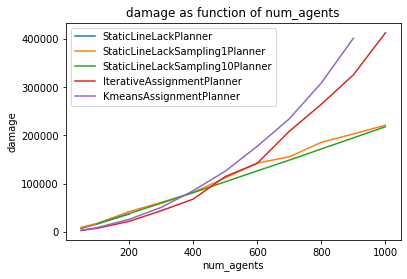

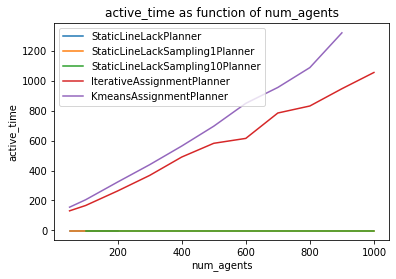

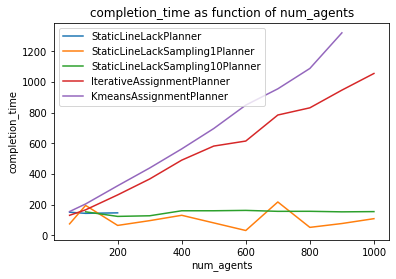

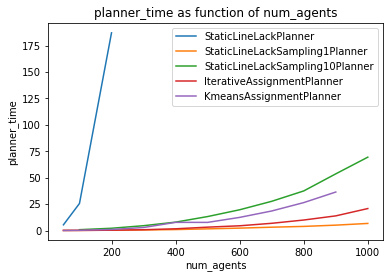

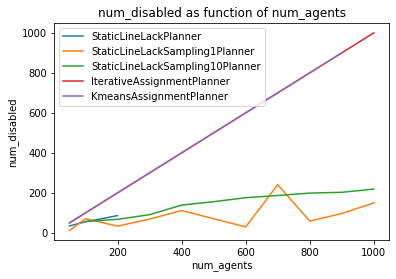

In [8]:
Y = ['damage', 'active_time', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]
    
    title = f'{y} as function of {x}'
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    # plt.figure(figsize=(10, 8))
    # plt.savefig('./plots/'+title+'.png')

    plt.legend(planners_names)
    plt.show()